In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
!pip install openpyxl
!pip install plotly
from plotly.subplots import make_subplots
import plotly.graph_objs as go
import plotly.express as px

In [2]:
stat = pd.read_excel('Telco_customer_churn_status.xlsx')
demo = pd.read_excel('Telco_customer_churn_demographics.xlsx')
serv = pd.read_excel('Telco_customer_churn_services.xlsx')
loca = pd.read_excel('Telco_customer_churn_location.xlsx')

key = ['Customer ID']
df = demo.merge(
    loca, left_on=key, right_on=key).merge(
    serv, left_on=key, right_on=key).merge(
    stat, left_on=key, right_on=key)
df.head(5)

Customer ID  Count_x  Gender  Age Under 30 Senior Citizen Married  \
0  8779-QRDMV        1    Male   78       No            Yes      No   
1  7495-OOKFY        1  Female   74       No            Yes     Yes   
2  1658-BYGOY        1    Male   71       No            Yes      No   
3  4598-XLKNJ        1  Female   78       No            Yes     Yes   
4  4846-WHAFZ        1  Female   80       No            Yes     Yes   

  Dependents  Number of Dependents Count_y  ... Count_y Quarter_y  \
0         No                     0       1  ...       1        Q3   
1        Yes                     1       1  ...       1        Q3   
2        Yes                     3       1  ...       1        Q3   
3        Yes                     1       1  ...       1        Q3   
4        Yes                     1       1  ...       1        Q3   

  Satisfaction Score  Customer Status Churn Label  Churn Value  Churn Score  \
0                  3          Churned         Yes            1           91   
1                  3          Churned         Yes            1           69   
2                  2          Churned         Yes            1           81   
3                  2          Churned         Yes            1           88   
4                  2          Churned         Yes            1           67   

   CLTV   Churn Category                  Churn Reason  
0  5433       Competitor  Competitor offered more data  
1  5302       Competitor  Competitor made better offer  
2  3179       Competitor  Competitor made better offer  
3  5337  Dissatisfaction     Limited range of services  
4  2793            Price            Extra data charges  

[5 rows x 56 columns]

In [3]:
df['Multiple Lines'].value_counts()

No     4072
Yes    2971
Name: Multiple Lines, dtype: int64

In [4]:
to_drop = ['Count_x','Quarter_x','Customer Status','Offer','Churn Label','Churn Score','Churn Reason','Count_y','Under 30','Senior Citizen','Dependents','Count_x',
           'Quarter_y','Referred a Friend','Number of Referrals','Avg Monthly Long Distance Charges','Internet Type','Avg Monthly GB Download','Total Refunds',
           'Total Extra Data Charges','Total Long Distance Charges','Total Revenue','Count_y','Country','State','Zip Code','Lat Long']
df.drop(to_drop, axis=1, inplace=True)
df.head(5)

Customer ID  Gender  Age Married  Number of Dependents         City  \
0  8779-QRDMV    Male   78      No                     0  Los Angeles   
1  7495-OOKFY  Female   74     Yes                     1  Los Angeles   
2  1658-BYGOY    Male   71      No                     3  Los Angeles   
3  4598-XLKNJ  Female   78     Yes                     1    Inglewood   
4  4846-WHAFZ  Female   80     Yes                     1     Whittier   

    Latitude   Longitude  Tenure in Months Phone Service  ... Unlimited Data  \
0  34.023810 -118.156582                 1            No  ...             No   
1  34.044271 -118.185237                 8           Yes  ...            Yes   
2  34.108833 -118.229715                18           Yes  ...            Yes   
3  33.936291 -118.332639                25           Yes  ...            Yes   
4  33.972119 -118.020188                37           Yes  ...            Yes   

         Contract Paperless Billing   Payment Method Monthly Charge  \
0  Month-to-Month               Yes  Bank Withdrawal          39.65   
1  Month-to-Month               Yes      Credit Card          80.65   
2  Month-to-Month               Yes  Bank Withdrawal          95.45   
3  Month-to-Month               Yes  Bank Withdrawal          98.50   
4  Month-to-Month               Yes  Bank Withdrawal          76.50   

  Total Charges Satisfaction Score Churn Value  CLTV   Churn Category  
0         39.65                  3           1  5433       Competitor  
1        633.30                  3           1  5302       Competitor  
2       1752.55                  2           1  3179       Competitor  
3       2514.50                  2           1  5337  Dissatisfaction  
4       2868.15                  2           1  2793            Price  

[5 rows x 29 columns]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             7043 non-null   object 
 1   Gender                  7043 non-null   object 
 2   Age                     7043 non-null   int64  
 3   Married                 7043 non-null   object 
 4   Number of Dependents    7043 non-null   int64  
 5   City                    7043 non-null   object 
 6   Latitude                7043 non-null   float64
 7   Longitude               7043 non-null   float64
 8   Tenure in Months        7043 non-null   int64  
 9   Phone Service           7043 non-null   object 
 10  Multiple Lines          7043 non-null   object 
 11  Internet Service        7043 non-null   object 
 12  Online Security         7043 non-null   object 
 13  Online Backup           7043 non-null   object 
 14  Device Protection Plan  7043 non-null   

In [6]:
df.isna().sum()

Customer ID                  0
Gender                       0
Age                          0
Married                      0
Number of Dependents         0
City                         0
Latitude                     0
Longitude                    0
Tenure in Months             0
Phone Service                0
Multiple Lines               0
Internet Service             0
Online Security              0
Online Backup                0
Device Protection Plan       0
Premium Tech Support         0
Streaming TV                 0
Streaming Movies             0
Streaming Music              0
Unlimited Data               0
Contract                     0
Paperless Billing            0
Payment Method               0
Monthly Charge               0
Total Charges                0
Satisfaction Score           0
Churn Value                  0
CLTV                         0
Churn Category            5174
dtype: int64

In [7]:
treatment = {'Churn Category': 'Not Churn'}
df = df.fillna(value=treatment)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 29 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             7043 non-null   object 
 1   Gender                  7043 non-null   object 
 2   Age                     7043 non-null   int64  
 3   Married                 7043 non-null   object 
 4   Number of Dependents    7043 non-null   int64  
 5   City                    7043 non-null   object 
 6   Latitude                7043 non-null   float64
 7   Longitude               7043 non-null   float64
 8   Tenure in Months        7043 non-null   int64  
 9   Phone Service           7043 non-null   object 
 10  Multiple Lines          7043 non-null   object 
 11  Internet Service        7043 non-null   object 
 12  Online Security         7043 non-null   object 
 13  Online Backup           7043 non-null   object 
 14  Device Protection Plan  7043 non-null   

In [9]:
df.isna().sum()

Customer ID               0
Gender                    0
Age                       0
Married                   0
Number of Dependents      0
City                      0
Latitude                  0
Longitude                 0
Tenure in Months          0
Phone Service             0
Multiple Lines            0
Internet Service          0
Online Security           0
Online Backup             0
Device Protection Plan    0
Premium Tech Support      0
Streaming TV              0
Streaming Movies          0
Streaming Music           0
Unlimited Data            0
Contract                  0
Paperless Billing         0
Payment Method            0
Monthly Charge            0
Total Charges             0
Satisfaction Score        0
Churn Value               0
CLTV                      0
Churn Category            0
dtype: int64

In [10]:
df['Number of Dependents'].unique()

array([0, 1, 3, 2, 5, 4, 6, 7, 8, 9], dtype=int64)

In [11]:
df['Age_Label'] = None
df['Churn_Label']=None
df['Month_Label']=None

In [12]:
df.loc[df['Age'] < 30, 'Age_Label'] = 'Under 30 years'
df.loc[df['Age'] > 65, 'Age_Label'] = 'Over 65 years'
df.loc[(df['Age']>=30) & (df['Age']<=65), 'Age_Label'] = 'From 30 to 65 years'
df.loc[df['Churn Value'] ==1, 'Churn_Label'] = 'Đã rời bỏ'
df.loc[df['Churn Value'] ==0, 'Churn_Label'] = 'Chưa rời bỏ'
df.loc[df['Tenure in Months'] <=3, 'Month_Label'] = '1 - 3 tháng'
df.loc[(df['Tenure in Months'] <=6) & (df['Tenure in Months'] >3), 'Month_Label'] = '3 - 6 tháng'
df.loc[(df['Tenure in Months'] <=12) & (df['Tenure in Months'] >6), 'Month_Label'] = '6 tháng - 1 năm'
df.loc[(df['Tenure in Months'] <=24) & (df['Tenure in Months'] >12), 'Month_Label'] = '1 - 2 năm'
df.loc[(df['Tenure in Months'] <=60) & (df['Tenure in Months'] >24), 'Month_Label'] = '2 - 5 năm'
df.loc[(df['Tenure in Months'] >60), 'Month_Label'] = 'trên 5 năm'
df['Number of Dependents'].replace([0,1,2,3,4,5,6,7,8,9], ['No','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes','Yes'], inplace=True)
df.head(5)

Customer ID  Gender  Age Married Number of Dependents         City  \
0  8779-QRDMV    Male   78      No                   No  Los Angeles   
1  7495-OOKFY  Female   74     Yes                  Yes  Los Angeles   
2  1658-BYGOY    Male   71      No                  Yes  Los Angeles   
3  4598-XLKNJ  Female   78     Yes                  Yes    Inglewood   
4  4846-WHAFZ  Female   80     Yes                  Yes     Whittier   

    Latitude   Longitude  Tenure in Months Phone Service  ...  \
0  34.023810 -118.156582                 1            No  ...   
1  34.044271 -118.185237                 8           Yes  ...   
2  34.108833 -118.229715                18           Yes  ...   
3  33.936291 -118.332639                25           Yes  ...   
4  33.972119 -118.020188                37           Yes  ...   

    Payment Method Monthly Charge Total Charges Satisfaction Score  \
0  Bank Withdrawal          39.65         39.65                  3   
1      Credit Card          80.65        633.30                  3   
2  Bank Withdrawal          95.45       1752.55                  2   
3  Bank Withdrawal          98.50       2514.50                  2   
4  Bank Withdrawal          76.50       2868.15                  2   

  Churn Value  CLTV   Churn Category      Age_Label Churn_Label  \
0           1  5433       Competitor  Over 65 years   Đã rời bỏ   
1           1  5302       Competitor  Over 65 years   Đã rời bỏ   
2           1  3179       Competitor  Over 65 years   Đã rời bỏ   
3           1  5337  Dissatisfaction  Over 65 years   Đã rời bỏ   
4           1  2793            Price  Over 65 years   Đã rời bỏ   

       Month_Label  
0      1 - 3 tháng  
1  6 tháng - 1 năm  
2        1 - 2 năm  
3        2 - 5 năm  
4        2 - 5 năm  

[5 rows x 32 columns]

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 32 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Customer ID             7043 non-null   object 
 1   Gender                  7043 non-null   object 
 2   Age                     7043 non-null   int64  
 3   Married                 7043 non-null   object 
 4   Number of Dependents    7043 non-null   object 
 5   City                    7043 non-null   object 
 6   Latitude                7043 non-null   float64
 7   Longitude               7043 non-null   float64
 8   Tenure in Months        7043 non-null   int64  
 9   Phone Service           7043 non-null   object 
 10  Multiple Lines          7043 non-null   object 
 11  Internet Service        7043 non-null   object 
 12  Online Security         7043 non-null   object 
 13  Online Backup           7043 non-null   object 
 14  Device Protection Plan  7043 non-null   

In [14]:
export_csv = df.to_csv (r'Telco customer churn.csv', index = None, header=True)

In [15]:
df['Month_Label'].unique()

array(['1 - 3 tháng', '6 tháng - 1 năm', '1 - 2 năm', '2 - 5 năm',
       '3 - 6 tháng', 'trên 5 năm'], dtype=object)

In [16]:
df['Multiple Lines'].value_counts()

No     4072
Yes    2971
Name: Multiple Lines, dtype: int64

### Churn

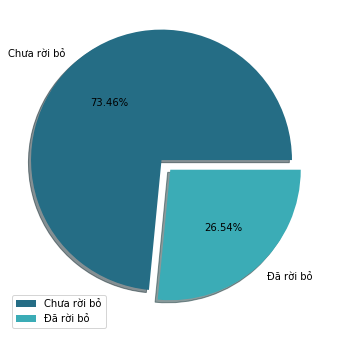

In [17]:
plt.figure(figsize= (10, 6))
data_pie  = df['Churn_Label'].value_counts()
labels = ['Chưa rời bỏ', 'Đã rời bỏ']
explode = [0.1, 0]
plt.pie(data_pie ,labels= labels , explode = explode , autopct="%1.2f%%", shadow= True, colors= ['#256D85', '#3BACB6'])
plt.legend()
plt.show()

### Giới tính

In [18]:
gt=df.groupby(['Churn_Label', 'Gender']).count().reset_index()
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Chưa rời bỏ', 'Đã rời bỏ'])
fig.add_trace(go.Pie(labels=gt[gt['Churn_Label']=='Chưa rời bỏ']['Gender'],
                     values=gt[gt['Churn_Label']=='Chưa rời bỏ']['Customer ID'], scalegroup='one',
                     name="Chưa rời bỏ"), 1, 1)
fig.add_trace(go.Pie(labels=gt[gt['Churn_Label']=='Đã rời bỏ']['Gender'],
                     values=gt[gt['Churn_Label']=='Đã rời bỏ']['Customer ID'], scalegroup='one',
                     name="Đã rời bỏ"), 1, 2)
fig.show()

### Tuổi

In [19]:
tuoi=df.groupby(['Churn_Label','Age_Label']).count().reset_index()
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Chưa rời bỏ', 'Đã rời bỏ'])
fig.add_trace(go.Pie(labels=tuoi[tuoi['Churn_Label']=='Chưa rời bỏ']['Age_Label'],
                     values=tuoi[tuoi['Churn_Label']=='Chưa rời bỏ']['Customer ID'], scalegroup='one',
                     name="Chưa rời bỏ"), 1, 1)
fig.add_trace(go.Pie(labels=tuoi[tuoi['Churn_Label']=='Đã rời bỏ']['Age_Label'],
                     values=tuoi[tuoi['Churn_Label']=='Đã rời bỏ']['Customer ID'], scalegroup='one',
                     name="Đã rời bỏ"), 1, 2)
fig.show()

In [20]:
import plotly.express as px
fig1 = px.sunburst(df,path=['Age_Label','Churn_Label'],template="plotly")
fig1.show()

### Kết hôn và số người phụ thuộc

In [21]:
fig1 = px.sunburst(df,path=['Number of Dependents','Churn_Label'],template="plotly")
fig1.show()

In [22]:
fig1 = px.sunburst(df,path=['Churn_Label','Number of Dependents'],template="plotly")
fig1.show()

In [23]:
import plotly.express as px
fig1 = px.sunburst(df,path=['Churn_Label','Married'],template="plotly")
fig1.show()

In [24]:
import plotly.express as px
fig1 = px.sunburst(df,path=['Married','Churn_Label'],template="plotly")
fig1.show()

### City

In [25]:
! pip install fiona geopandas xgboost gensim folium pyLDAvis descartes
import geopandas as gpd
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
%matplotlib inline
ct=df[['Churn_Label','City','Customer ID','Latitude','Longitude']]
ct["Coordinates"] = list(zip(ct.Longitude, ct.Latitude))
ct["Coordinates"] = ct["Coordinates"].apply(Point)
gdf = gpd.GeoDataFrame(ct, geometry="Coordinates")
gdf.head()

<ipython-input-25-d6efd0dbea29>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

<ipython-input-25-d6efd0dbea29>:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



Churn_Label         City Customer ID   Latitude   Longitude  \
0   Đã rời bỏ  Los Angeles  8779-QRDMV  34.023810 -118.156582   
1   Đã rời bỏ  Los Angeles  7495-OOKFY  34.044271 -118.185237   
2   Đã rời bỏ  Los Angeles  1658-BYGOY  34.108833 -118.229715   
3   Đã rời bỏ    Inglewood  4598-XLKNJ  33.936291 -118.332639   
4   Đã rời bỏ     Whittier  4846-WHAFZ  33.972119 -118.020188   

                   Coordinates  
0  POINT (-118.15658 34.02381)  
1  POINT (-118.18524 34.04427)  
2  POINT (-118.22971 34.10883)  
3  POINT (-118.33264 33.93629)  
4  POINT (-118.02019 33.97212)

In [26]:
print('gdf is of type:', type(gdf))

# And how can we tell which column is the geometry column?
print('\nThe geometry column is:', gdf.geometry.name)

gdf is of type: <class 'geopandas.geodataframe.GeoDataFrame'>

The geometry column is: Coordinates


In [27]:
county_df = gpd.read_file("https://datascience.quantecon.org/assets/data/cb_2016_us_county_5m.zip")

In [28]:
county_df = county_df.query("STATEFP == '06'")

C:\Users\USER\anaconda3\lib\site-packages\geopandas\plotting.py:693: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.

<ipython-input-29-6629f8cda516>:4: MatplotlibDeprecationWarning:

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.



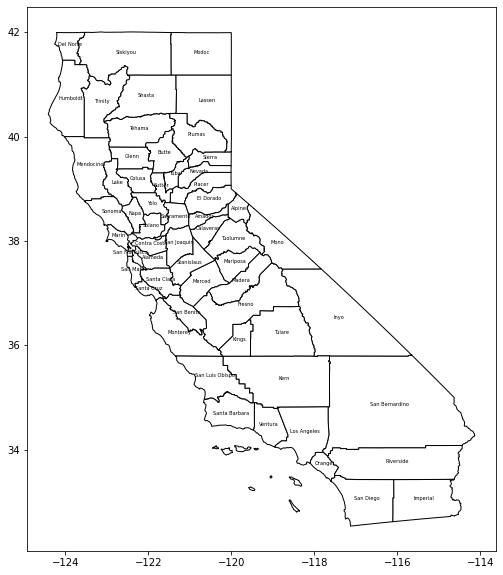

In [29]:
fig, gax = plt.subplots(figsize=(10, 10))
county_df.query("NAME == 'California'").plot(ax=gax, edgecolor="black", color="white")
county_df.plot(ax=gax, edgecolor="black", color="white")
county_df.apply(lambda x: gax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=5),axis=1)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\geopandas\plotting.py:693: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.

<ipython-input-30-397df709e732>:4: MatplotlibDeprecationWarning:

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.



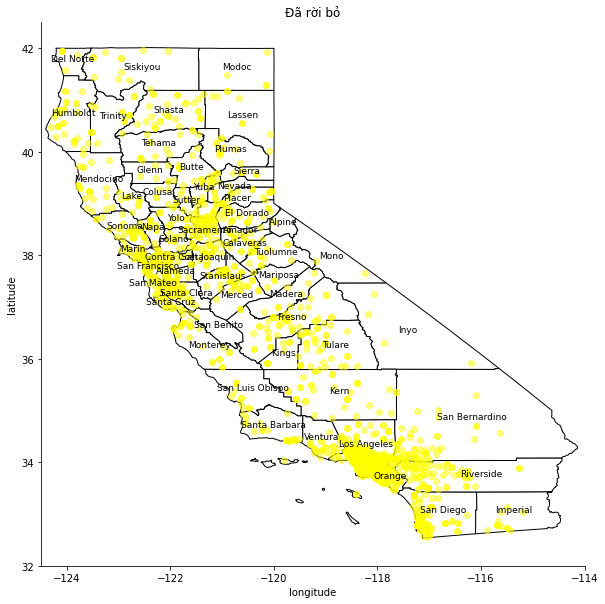

In [30]:
fig,gax = plt.subplots(figsize=(10,10))
county_df.query("NAME == 'California'").plot(ax=gax, edgecolor="black", color="white")
county_df.plot(ax=gax, edgecolor="black", color='white')
county_df.apply(lambda x: gax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=9),axis=1)
gdf[gdf.Churn_Label=='Đã rời bỏ'].plot(ax = gax,color='yellow', alpha = 0.5)
plt.xlim(-124.5,-114)
plt.ylim(32,42.5)
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Đã rời bỏ')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.show()

C:\Users\USER\anaconda3\lib\site-packages\geopandas\plotting.py:693: UserWarning:

The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.

<ipython-input-31-03026400d7f2>:4: MatplotlibDeprecationWarning:

The 's' parameter of annotate() has been renamed 'text' since Matplotlib 3.3; support for the old name will be dropped two minor releases later.



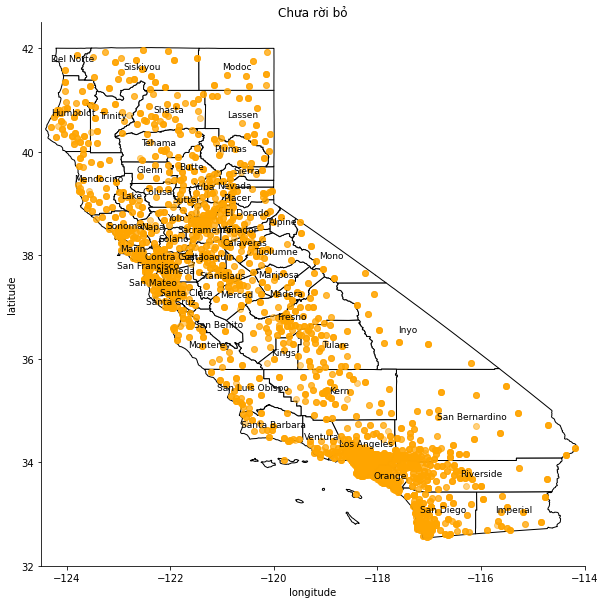

In [31]:
fig,gax = plt.subplots(figsize=(10,10))
county_df.query("NAME == 'California'").plot(ax=gax, edgecolor="black", color="white")
county_df.plot(ax=gax, edgecolor="black", color="white")
county_df.apply(lambda x: gax.annotate(s=x.NAME, xy=x.geometry.centroid.coords[0], ha='center', fontsize=9),axis=1)
gdf[gdf.Churn_Label=='Chưa rời bỏ'].plot(ax = gax,color='Orange', alpha = 0.5)
plt.xlim(-124.5,-114)
plt.ylim(32,42.5)
gax.set_xlabel('longitude')
gax.set_ylabel('latitude')
gax.set_title('Chưa rời bỏ')
gax.spines['top'].set_visible(False)
gax.spines['right'].set_visible(False)
plt.show()

In [32]:
df.head(1).values

array([['8779-QRDMV', 'Male', 78, 'No', 'No', 'Los Angeles', 34.02381,
        -118.156582, 1, 'No', 'No', 'Yes', 'No', 'No', 'Yes', 'No', 'No',
        'Yes', 'No', 'No', 'Month-to-Month', 'Yes', 'Bank Withdrawal',
        39.65, 39.65, 3, 1, 5433, 'Competitor', 'Over 65 years',
        'Đã rời bỏ', '1 - 3 tháng']], dtype=object)

In [33]:
mon=df.groupby(['Churn_Label','Month_Label']).count().reset_index()
mon
fig = make_subplots(1, 2, specs=[[{'type':'domain'}, {'type':'domain'}]],
                    subplot_titles=['Chưa rời bỏ', 'Đã rời bỏ'])
fig.add_trace(go.Pie(labels=mon[mon['Churn_Label']=='Chưa rời bỏ']['Month_Label'],
                     values=mon[mon['Churn_Label']=='Chưa rời bỏ']['Customer ID'], scalegroup='one',
                     name="Chưa rời bỏ"), 1, 1)
fig.add_trace(go.Pie(labels=mon[mon['Churn_Label']=='Đã rời bỏ']['Month_Label'],
                     values=mon[mon['Churn_Label']=='Đã rời bỏ']['Customer ID'], scalegroup='one',
                     name="Đã rời bỏ"), 1, 2)
fig.show()

In [34]:
import plotly.express as px
fig1 = px.sunburst(df,path=['Month_Label','Churn_Label'],template="plotly")
fig1.show()

Text(0.5, 1.0, 'Unlimited Data')

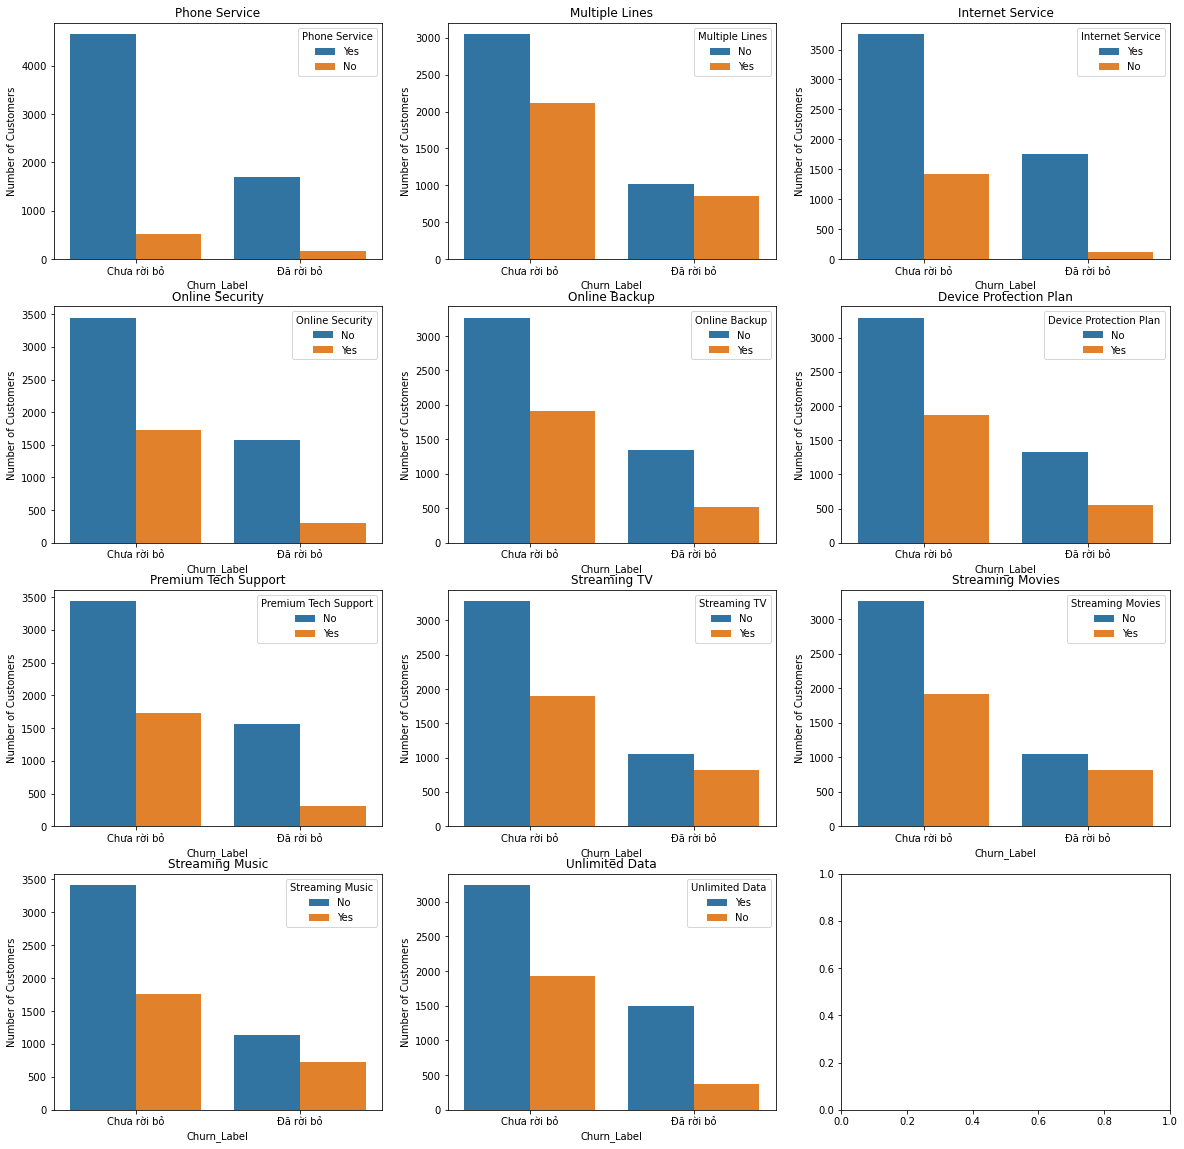

In [35]:
fig,ax = plt.subplots(4,3, figsize=(20,20))
gb = df.groupby("Churn_Label")["Multiple Lines"].value_counts().to_frame().rename({"Multiple Lines": "Number of Customers"}, axis = 1).reset_index()
sns.barplot(x = "Churn_Label", y = "Number of Customers", data = gb, hue = "Multiple Lines",ax=ax[0][1]).set_title("Multiple Lines")
gb = df.groupby("Churn_Label")["Phone Service"].value_counts().to_frame().rename({"Phone Service": "Number of Customers"}, axis = 1).reset_index()
sns.barplot(x = "Churn_Label", y = "Number of Customers", data = gb, hue = "Phone Service",ax=ax[0][0]).set_title("Phone Service")
gb = df.groupby("Churn_Label")["Internet Service"].value_counts().to_frame().rename({"Internet Service": "Number of Customers"}, axis = 1).reset_index()
sns.barplot(x = "Churn_Label", y = "Number of Customers", data = gb, hue = "Internet Service",ax=ax[0][2]).set_title("Internet Service")
gb = df.groupby("Churn_Label")["Online Security"].value_counts().to_frame().rename({"Online Security": "Number of Customers"}, axis = 1).reset_index()
sns.barplot(x = "Churn_Label", y = "Number of Customers", data = gb, hue = "Online Security",ax=ax[1][0]).set_title("Online Security")
gb = df.groupby("Churn_Label")["Online Backup"].value_counts().to_frame().rename({"Online Backup": "Number of Customers"}, axis = 1).reset_index()
sns.barplot(x = "Churn_Label", y = "Number of Customers", data = gb, hue = "Online Backup",ax=ax[1][1]).set_title("Online Backup")
gb = df.groupby("Churn_Label")["Device Protection Plan"].value_counts().to_frame().rename({"Device Protection Plan": "Number of Customers"}, axis = 1).reset_index()
sns.barplot(x = "Churn_Label", y = "Number of Customers", data = gb, hue = "Device Protection Plan",ax=ax[1][2]).set_title("Device Protection Plan")
gb = df.groupby("Churn_Label")["Premium Tech Support"].value_counts().to_frame().rename({"Premium Tech Support": "Number of Customers"}, axis = 1).reset_index()
sns.barplot(x = "Churn_Label", y = "Number of Customers", data = gb, hue = "Premium Tech Support",ax=ax[2][0]).set_title("Premium Tech Support")
gb = df.groupby("Churn_Label")["Streaming TV"].value_counts().to_frame().rename({"Streaming TV": "Number of Customers"}, axis = 1).reset_index()
sns.barplot(x = "Churn_Label", y = "Number of Customers", data = gb, hue = "Streaming TV",ax=ax[2][1]).set_title("Streaming TV")
gb = df.groupby("Churn_Label")["Streaming Movies"].value_counts().to_frame().rename({"Streaming Movies": "Number of Customers"}, axis = 1).reset_index()
sns.barplot(x = "Churn_Label", y = "Number of Customers", data = gb, hue = "Streaming Movies",ax=ax[2][2]).set_title("Streaming Movies")
gb = df.groupby("Churn_Label")["Streaming Music"].value_counts().to_frame().rename({"Streaming Music": "Number of Customers"}, axis = 1).reset_index()
sns.barplot(x = "Churn_Label", y = "Number of Customers", data = gb, hue = "Streaming Music",ax=ax[3][0]).set_title("Streaming Music")
gb = df.groupby("Churn_Label")["Unlimited Data"].value_counts().to_frame().rename({"Unlimited Data": "Number of Customers"}, axis = 1).reset_index()
sns.barplot(x = "Churn_Label", y = "Number of Customers", data = gb, hue = "Unlimited Data",ax=ax[3][1]).set_title("Unlimited Data")

<ipython-input-36-aecf2c711abf>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-36-aecf2c711abf>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-36-aecf2c711abf>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-36-aecf2c711abf>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-36-aecf2c711abf>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-36-aecf2c711abf>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, 'Two Year')

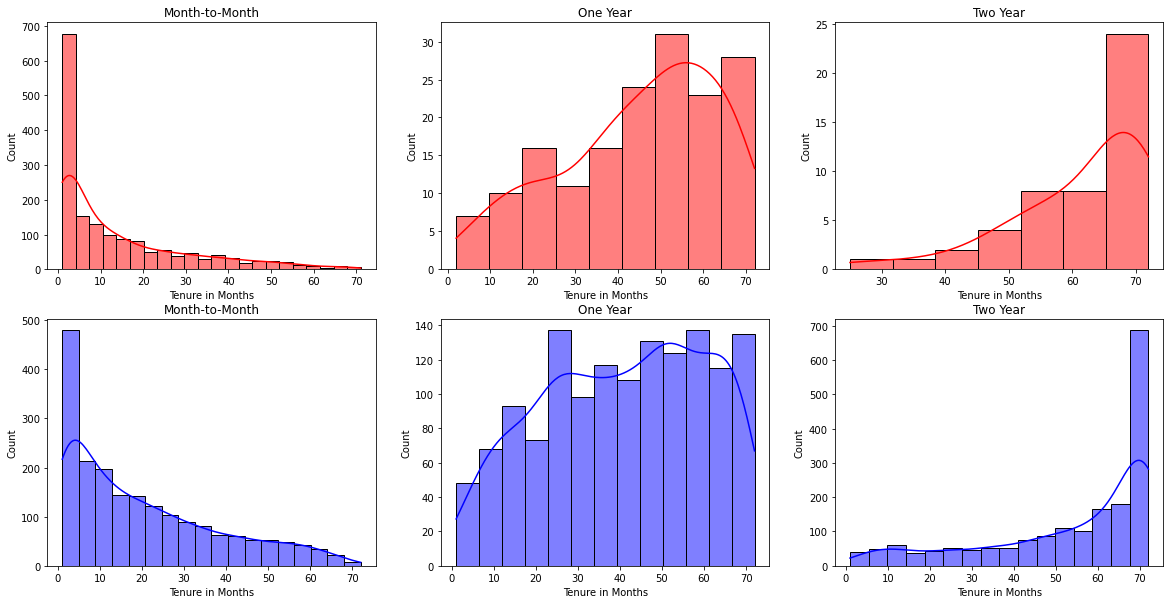

In [36]:
fig,ax = plt.subplots(2,3, figsize=(20,10))
sns.histplot(data=df[df['Contract']=='Month-to-Month'][df['Churn_Label']=='Đã rời bỏ'], x='Tenure in Months',kde=True,ax=ax[0][0],color="red").set_title("Month-to-Month")
sns.histplot(data=df[df['Contract']=='One Year'][df['Churn_Label']=='Đã rời bỏ'], x='Tenure in Months',kde=True,ax=ax[0][1],color="red").set_title("One Year")
sns.histplot(data=df[df['Contract']=='Two Year'][df['Churn_Label']=='Đã rời bỏ'], x='Tenure in Months',kde=True,ax=ax[0][2],color="red").set_title("Two Year")
sns.histplot(data=df[df['Contract']=='Month-to-Month'][df['Churn_Label']=='Chưa rời bỏ'], x='Tenure in Months',kde=True,ax=ax[1][0],color="blue").set_title("Month-to-Month")
sns.histplot(data=df[df['Contract']=='One Year'][df['Churn_Label']=='Chưa rời bỏ'], x='Tenure in Months',kde=True,ax=ax[1][1],color="blue").set_title("One Year")
sns.histplot(data=df[df['Contract']=='Two Year'][df['Churn_Label']=='Chưa rời bỏ'], x='Tenure in Months',kde=True,ax=ax[1][2],color="blue").set_title("Two Year")

<ipython-input-37-388baadf9dd5>:2: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-37-388baadf9dd5>:3: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-37-388baadf9dd5>:4: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-37-388baadf9dd5>:5: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-37-388baadf9dd5>:6: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.

<ipython-input-37-388baadf9dd5>:7: UserWarning:

Boolean Series key will be reindexed to match DataFrame index.



Text(0.5, 1.0, 'Mailed Check')

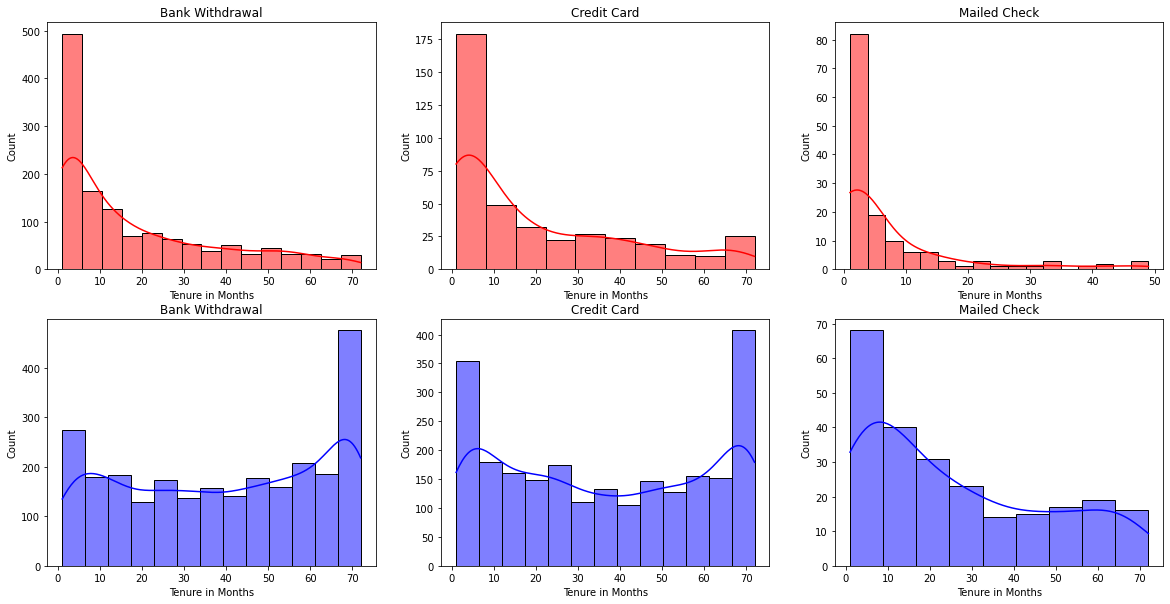

In [37]:
fig,ax = plt.subplots(2,3, figsize=(20,10))
sns.histplot(data=df[df['Payment Method']=='Bank Withdrawal'][df['Churn_Label']=='Đã rời bỏ'], x='Tenure in Months',kde=True,ax=ax[0][0],color="red").set_title("Bank Withdrawal")
sns.histplot(data=df[df['Payment Method']=='Credit Card'][df['Churn_Label']=='Đã rời bỏ'], x='Tenure in Months',kde=True,ax=ax[0][1],color="red").set_title("Credit Card")
sns.histplot(data=df[df['Payment Method']=='Mailed Check'][df['Churn_Label']=='Đã rời bỏ'], x='Tenure in Months',kde=True,ax=ax[0][2],color="red").set_title("Mailed Check")
sns.histplot(data=df[df['Payment Method']=='Bank Withdrawal'][df['Churn_Label']=='Chưa rời bỏ'], x='Tenure in Months',kde=True,ax=ax[1][0],color="blue").set_title("Bank Withdrawal")
sns.histplot(data=df[df['Payment Method']=='Credit Card'][df['Churn_Label']=='Chưa rời bỏ'], x='Tenure in Months',kde=True,ax=ax[1][1],color="blue").set_title("Credit Card")
sns.histplot(data=df[df['Payment Method']=='Mailed Check'][df['Churn_Label']=='Chưa rời bỏ'], x='Tenure in Months',kde=True,ax=ax[1][2],color="blue").set_title("Mailed Check")

([<matplotlib.axis.YTick at 0x28a047dfe20>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

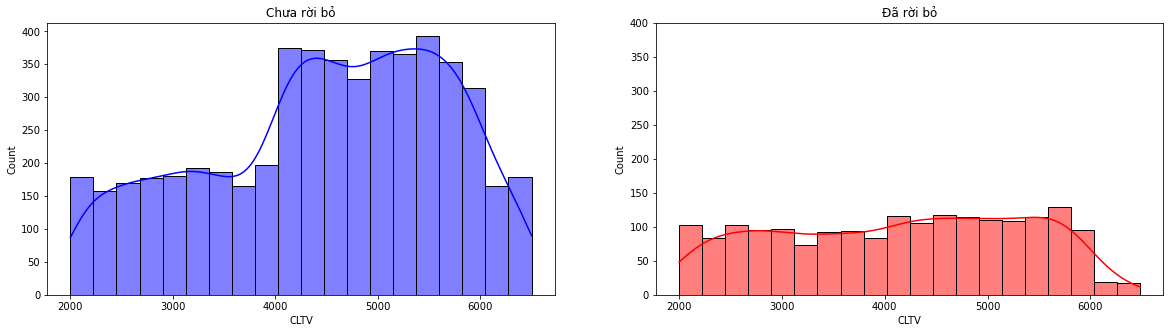

In [38]:
fig,ax = plt.subplots(1,2, figsize=(20,5))
sns.histplot(data=df[df['Churn_Label']=='Chưa rời bỏ'], x='CLTV',kde=True,ax=ax[0],color="blue",bins=20).set_title("Chưa rời bỏ")
sns.histplot(data=df[df['Churn_Label']=='Đã rời bỏ'], x='CLTV',kde=True,ax=ax[1],color="red",bins=20).set_title("Đã rời bỏ")
plt.yticks(np.arange(0, 400+1, 50))

In [39]:
fig = px.box(df, y="Churn_Label",x="CLTV")
fig.show()

([<matplotlib.axis.YTick at 0x28a054f5df0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

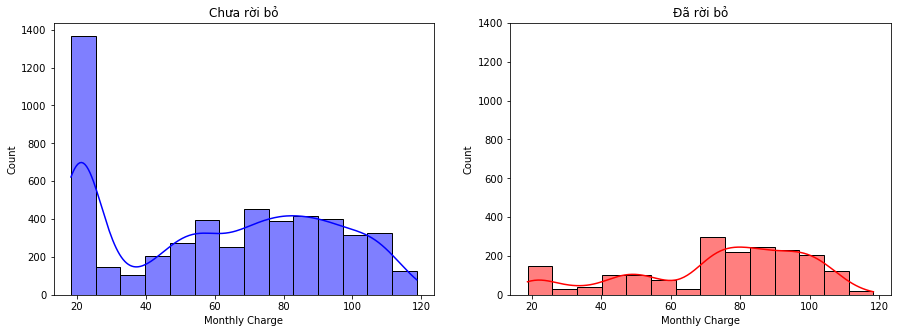

In [40]:
fig,ax = plt.subplots(1,2, figsize=(15,5))
sns.histplot(data=df[df['Churn_Label']=='Đã rời bỏ'], x='Monthly Charge',kde=True,ax=ax[1],color="red",bins=14).set_title("Đã rời bỏ")
sns.histplot(data=df[df['Churn_Label']=='Chưa rời bỏ'], x='Monthly Charge',kde=True,ax=ax[0],color="blue",bins=14).set_title("Chưa rời bỏ")
plt.yticks(np.arange(0, 1400+1, 200))

In [41]:
import plotly.express as px
fig = px.box(df, x="Churn_Label", y="Monthly Charge")
fig.show()

In [42]:
import plotly.express as px
fig1 = px.sunburst(df,path=['Satisfaction Score','Churn_Label'],
                   color_discrete_sequence=px.colors.qualitative.Pastel,template="plotly")
fig1.show()

In [43]:
fig=px.pie(df,values=df["Churn Category"].value_counts()[1:],
           names=["Competitor",'Attitude','Dissatisfaction','Price','Other'],
           hole=.4,color_discrete_sequence=px.colors.qualitative.Pastel,template="plotly")
fig.update_layout(title_font_size=30)
fig.show()

In [44]:
a=df.groupby("Churn_Label")
l=[]
for name,group in a:
    l.append(group)
notchurn=l[0].reset_index()
churn=l[1].reset_index()
notchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5174 entries, 0 to 5173
Data columns (total 33 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   index                   5174 non-null   int64  
 1   Customer ID             5174 non-null   object 
 2   Gender                  5174 non-null   object 
 3   Age                     5174 non-null   int64  
 4   Married                 5174 non-null   object 
 5   Number of Dependents    5174 non-null   object 
 6   City                    5174 non-null   object 
 7   Latitude                5174 non-null   float64
 8   Longitude               5174 non-null   float64
 9   Tenure in Months        5174 non-null   int64  
 10  Phone Service           5174 non-null   object 
 11  Multiple Lines          5174 non-null   object 
 12  Internet Service        5174 non-null   object 
 13  Online Security         5174 non-null   object 
 14  Online Backup           5174 non-null   

In [45]:
nc=notchurn.iloc[:,[10,11,12,13,14,15,16,17,18,19,20]]
nc

Phone Service Multiple Lines Internet Service Online Security  \
0              Yes            Yes              Yes             Yes   
1              Yes             No              Yes              No   
2              Yes             No              Yes              No   
3              Yes            Yes              Yes              No   
4              Yes            Yes              Yes             Yes   
...            ...            ...              ...             ...   
5169           Yes             No               No              No   
5170           Yes            Yes              Yes             Yes   
5171           Yes            Yes              Yes              No   
5172            No             No              Yes             Yes   
5173           Yes             No              Yes             Yes   

     Online Backup Device Protection Plan Premium Tech Support Streaming TV  \
0              Yes                    Yes                  Yes           No   
1               No                    Yes                   No          Yes   
2               No                     No                   No           No   
3              Yes                     No                   No          Yes   
4               No                     No                  Yes          Yes   
...            ...                    ...                  ...          ...   
5169            No                     No                   No           No   
5170            No                    Yes                  Yes          Yes   
5171           Yes                    Yes                   No          Yes   
5172            No                     No                   No           No   
5173            No                    Yes                  Yes          Yes   

     Streaming Movies Streaming Music Unlimited Data  
0                  No              No            Yes  
1                 Yes              No             No  
2                  No              No            Yes  
3                  No              No            Yes  
4                  No              No            Yes  
...               ...             ...            ...  
5169               No              No             No  
5170              Yes             Yes            Yes  
5171              Yes             Yes            Yes  
5172               No              No            Yes  
5173              Yes             Yes            Yes  

[5174 rows x 11 columns]

In [46]:
dataset=[]
for i in range(len(nc)):
    x=[]
    for j in nc.columns[:]:
        if nc[j][i]=='Yes':
            x.append(j)
    dataset.append(x)


In [47]:
!pip install mlxtend

In [48]:
from mlxtend.preprocessing import TransactionEncoder 
from mlxtend.frequent_patterns import association_rules, apriori

In [49]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
nc = pd.DataFrame(te_ary, columns=te.columns_)
nc

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Device Protection Plan  Internet Service  Multiple Lines  Online Backup  \
0                       True              True            True           True   
1                       True              True           False          False   
2                      False              True           False          False   
3                      False              True            True           True   
4                      False              True            True          False   
...                      ...               ...             ...            ...   
5169                   False             False           False          False   
5170                    True              True            True          False   
5171                    True              True            True           True   
5172                   False              True           False          False   
5173                    True              True           False          False   

      Online Security  Phone Service  Premium Tech Support  Streaming Movies  \
0                True           True                  True             False   
1               False           True                 False              True   
2               False           True                 False             False   
3               False           True                 False             False   
4                True           True                  True             False   
...               ...            ...                   ...               ...   
5169            False           True                 False             False   
5170             True           True                  True              True   
5171            False           True                 False              True   
5172             True          False                 False             False   
5173             True           True                  True              True   

      Streaming Music  Streaming TV  Unlimited Data  
0               False         False            True  
1               False          True           False  
2               False         False            True  
3               False          True            True  
4               False          True            True  
...               ...           ...             ...  
5169            False         False           False  
5170             True          True            True  
5171             True          True            True  
5172            False         False            True  
5173             True          True            True  

[5174 rows x 11 columns]

In [50]:
frequent_itemsets = apriori (nc, min_support = 0.2, use_colnames = True) 
rules = association_rules (frequent_itemsets, metric='lift', min_threshold=1.08) 
frequent_itemsets['length'] =frequent_itemsets['itemsets'].apply(lambda x: len(x))
rules.sort_values(['support'],ascending=False).head(50)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



antecedents  \
29                     (Internet Service)   
28                       (Unlimited Data)   
212       (Unlimited Data, Phone Service)   
213     (Internet Service, Phone Service)   
214                      (Unlimited Data)   
215                    (Internet Service)   
33                        (Phone Service)   
32                       (Multiple Lines)   
23                     (Internet Service)   
22                     (Streaming Movies)   
17                     (Internet Service)   
16                        (Online Backup)   
26                         (Streaming TV)   
27                     (Internet Service)   
0                (Device Protection Plan)   
1                      (Internet Service)   
145                    (Internet Service)   
144                       (Phone Service)   
143                      (Multiple Lines)   
142     (Internet Service, Phone Service)   
141    (Multiple Lines, Internet Service)   
140       (Multiple Lines, Phone Service)   
15                     (Internet Service)   
14                       (Multiple Lines)   
24                      (Streaming Music)   
25                     (Internet Service)   
21                     (Internet Service)   
20                 (Premium Tech Support)   
18                     (Internet Service)   
19                      (Online Security)   
53                     (Streaming Movies)   
233                    (Internet Service)   
232                    (Streaming Movies)   
231                     (Streaming Music)   
230  (Streaming Movies, Internet Service)   
229   (Streaming Music, Internet Service)   
228   (Streaming Music, Streaming Movies)   
52                      (Streaming Music)   
202                    (Streaming Movies)   
200     (Streaming Movies, Phone Service)   
201     (Internet Service, Phone Service)   
203                    (Internet Service)   
208         (Streaming TV, Phone Service)   
211                    (Internet Service)   
210                        (Streaming TV)   
209     (Internet Service, Phone Service)   
166                       (Online Backup)   
165     (Internet Service, Phone Service)   
167                    (Internet Service)   
164        (Phone Service, Online Backup)   

                              consequents  antecedent support  \
29                       (Unlimited Data)            0.726904   
28                     (Internet Service)            0.626788   
212                    (Internet Service)            0.541554   
213                      (Unlimited Data)            0.627947   
214     (Internet Service, Phone Service)            0.626788   
215       (Unlimited Data, Phone Service)            0.726904   
33                       (Multiple Lines)            0.901044   
32                        (Phone Service)            0.409934   
23                     (Streaming Movies)            0.726904   
22                     (Internet Service)            0.369927   
17                        (Online Backup)            0.726904   
16                     (Internet Service)            0.368380   
26                     (Internet Service)            0.365868   
27                         (Streaming TV)            0.726904   
0                      (Internet Service)            0.362775   
1                (Device Protection Plan)            0.726904   
145       (Multiple Lines, Phone Service)            0.726904   
144    (Multiple Lines, Internet Service)            0.901044   
143     (Internet Service, Phone Service)            0.409934   
142                      (Multiple Lines)            0.627947   
141                       (Phone Service)            0.345767   
140                    (Internet Service)            0.409934   
15                       (Multiple Lines)            0.726904   
14                     (Internet Service)            0.409934   
24                     (Internet Service)            0.340162   
25                      (Streaming Music)   

In [51]:
c=churn.iloc[:,[9,10,11,12,13,14,15,16,17,18,19]]
c

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Tenure in Months Phone Service Multiple Lines Internet Service  \
0                    1            No             No              Yes   
1                    8           Yes            Yes              Yes   
2                   18           Yes            Yes              Yes   
3                   25           Yes             No              Yes   
4                   37           Yes            Yes              Yes   
...                ...           ...            ...              ...   
1864                 4           Yes             No              Yes   
1865                 1           Yes             No              Yes   
1866                12           Yes             No              Yes   
1867                 9           Yes             No              Yes   
1868                67           Yes            Yes              Yes   

     Online Security Online Backup Device Protection Plan  \
0                 No            No                    Yes   
1                 No           Yes                     No   
2                 No            No                     No   
3                 No           Yes                    Yes   
4                 No            No                     No   
...              ...           ...                    ...   
1864             Yes           Yes                     No   
1865              No            No                     No   
1866              No            No                     No   
1867              No            No                     No   
1868             Yes           Yes                    Yes   

     Premium Tech Support Streaming TV Streaming Movies Streaming Music  
0                      No           No              Yes              No  
1                      No           No               No              No  
2                      No          Yes              Yes             Yes  
3                      No          Yes              Yes              No  
4                      No           No               No              No  
...                   ...          ...              ...             ...  
1864                  Yes           No               No              No  
1865                   No           No               No              No  
1866                  Yes          Yes               No              No  
1867                   No           No               No              No  
1868                   No          Yes               No              No  

[1869 rows x 11 columns]

In [52]:
dataset=[]
for i in range(len(c)):
    x=[]
    for j in c.columns[:]:
        if c[j][i]=='Yes':
            x.append(j)
    dataset.append(x)


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [53]:
te = TransactionEncoder()
te_ary = te.fit(dataset).transform(dataset)
c = pd.DataFrame(te_ary, columns=te.columns_)
c

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Device Protection Plan  Internet Service  Multiple Lines  Online Backup  \
0                       True              True           False          False   
1                      False              True            True           True   
2                      False              True            True          False   
3                       True              True           False           True   
4                      False              True            True          False   
...                      ...               ...             ...            ...   
1864                   False              True           False           True   
1865                   False              True           False          False   
1866                   False              True           False          False   
1867                   False              True           False          False   
1868                    True              True            True           True   

      Online Security  Phone Service  Premium Tech Support  Streaming Movies  \
0               False          False                 False              True   
1               False           True                 False             False   
2               False           True                 False              True   
3               False           True                 False              True   
4               False           True                 False             False   
...               ...            ...                   ...               ...   
1864             True           True                  True             False   
1865            False           True                 False             False   
1866            False           True                  True             False   
1867            False           True                 False             False   
1868             True           True                 False             False   

      Streaming Music  Streaming TV  
0               False         False  
1               False         False  
2                True          True  
3               False          True  
4               False         False  
...               ...           ...  
1864            False         False  
1865            False         False  
1866            False          True  
1867            False         False  
1868            False          True  

[1869 rows x 10 columns]

In [54]:
frequent_itemsets = apriori (c, min_support = 0.2, use_colnames = True) 
rules = association_rules (frequent_itemsets, metric='lift', min_threshold=1.08) 
frequent_itemsets['length'] =frequent_itemsets['itemsets'].apply(lambda x: len(x))
rules.sort_values(['support'],ascending=False).head(50)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



antecedents  \
0                                     (Multiple Lines)   
1                                      (Phone Service)   
16                                    (Multiple Lines)   
17                                     (Phone Service)   
14                  (Multiple Lines, Internet Service)   
15                   (Internet Service, Phone Service)   
31                                      (Streaming TV)   
30                   (Internet Service, Phone Service)   
35                                  (Streaming Movies)   
34                                   (Streaming Music)   
33                (Streaming Movies, Internet Service)   
32                 (Streaming Music, Internet Service)   
8                                    (Streaming Music)   
9                                   (Streaming Movies)   
119                (Streaming Music, Internet Service)   
118                   (Streaming Music, Phone Service)   
62                    (Streaming Music, Phone Service)   
117  (Streaming Movies, Internet Service, Phone Ser...   
116  (Streaming Music, Internet Service, Phone Serv...   
121               (Streaming Movies, Internet Service)   
120                  (Streaming Movies, Phone Service)   
63                   (Streaming Movies, Phone Service)   
122                                  (Streaming Music)   
123                                 (Streaming Movies)   
65                                  (Streaming Movies)   
64                                   (Streaming Music)   
36                (Streaming Movies, Internet Service)   
39                                      (Streaming TV)   
11                                      (Streaming TV)   
37                    (Streaming TV, Internet Service)   
10                                  (Streaming Movies)   
38                                  (Streaming Movies)   
69                                      (Streaming TV)   
68                                  (Streaming Movies)   
67                       (Streaming TV, Phone Service)   
66                   (Streaming Movies, Phone Service)   
133                                     (Streaming TV)   
132                                 (Streaming Movies)   
125    (Internet Service, Streaming TV, Phone Service)   
131                   (Streaming TV, Internet Service)   
130                  (Internet Service, Phone Service)   
129                      (Streaming TV, Phone Service)   
128               (Streaming Movies, Internet Service)   
127                   (Streaming Movies, Streaming TV)   
126                  (Streaming Movies, Phone Service)   
124  (Streaming Movies, Internet Service, Phone Ser...   
82   (Multiple Lines, Internet Service, Phone Service)   
81   (Streaming Movies, Internet Service, Phone Ser...   
83                  (Streaming Movies, Multiple Lines)   
84                   (Streaming Movies, Phone Service)   

                                           consequents  antecedent support  \
0                                      (Phone Service)            0.454789   
1                                     (Multiple Lines)            0.909042   
16                   (Internet Service, Phone Service)            0.454789   
17                  (Multiple Lines, Internet Service)            0.909042   
14                                     (Phone Service)            0.449438   
15                                    (Multiple Lines)            0.848582   
31                   (Internet Service, Phone Service)            0.435527   
30                                      (Streaming TV)            0.848582   
35                 (Streaming Music, Internet Service)            0.437667   
34                (Streaming Movies, Internet Service)            0.389513   
33                                   (Streaming Music)            0.437667   
32                                  (Streaming Movies)            0.389513   
8                                   (Streaming Movies)            0.38

In [55]:
do_dummy_cols = ['Gender', 'Married', 'Number of Dependents', 'Phone Service', 'Multiple Lines',
       'Internet Service', 'Online Security', 'Online Backup', 'Device Protection Plan',
       'Premium Tech Support', 'Streaming TV', 'Streaming Movies', 'Streaming Music', 'Unlimited Data', 'Contract',
       'Paperless Billing', 'Payment Method']
model_df = df.copy()
model_df = pd.get_dummies(model_df, columns=do_dummy_cols)
model_df

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Customer ID  Age          City   Latitude   Longitude  Tenure in Months  \
0     8779-QRDMV   78   Los Angeles  34.023810 -118.156582                 1   
1     7495-OOKFY   74   Los Angeles  34.044271 -118.185237                 8   
2     1658-BYGOY   71   Los Angeles  34.108833 -118.229715                18   
3     4598-XLKNJ   78     Inglewood  33.936291 -118.332639                25   
4     4846-WHAFZ   80      Whittier  33.972119 -118.020188                37   
...          ...  ...           ...        ...         ...               ...   
7038  2569-WGERO   30       Landers  34.341737 -116.539416                72   
7039  6840-RESVB   38      Adelanto  34.667815 -117.536183                24   
7040  2234-XADUH   30         Amboy  34.559882 -115.637164                72   
7041  4801-JZAZL   32  Angelus Oaks  34.167800 -116.864330                11   
7042  3186-AJIEK   44  Apple Valley  34.424926 -117.184503                66   

      Monthly Charge  Total Charges  Satisfaction Score  Churn Value  ...  \
0              39.65          39.65                   3            1  ...   
1              80.65         633.30                   3            1  ...   
2              95.45        1752.55                   2            1  ...   
3              98.50        2514.50                   2            1  ...   
4              76.50        2868.15                   2            1  ...   
...              ...            ...                 ...          ...  ...   
7038           21.15        1419.40                   5            0  ...   
7039           84.80        1990.50                   3            0  ...   
7040          103.20        7362.90                   4            0  ...   
7041           29.60         346.45                   4            0  ...   
7042          105.65        6844.50                   4            0  ...   

      Unlimited Data_No Unlimited Data_Yes Contract_Month-to-Month  \
0                     1                  0                       1   
1                     0                  1                       1   
2                     0                  1                       1   
3                     0                  1                       1   
4                     0                  1                       1   
...                 ...                ...                     ...   
7038                  1                  0                       0   
7039                  0                  1                       0   
7040                  0                  1                       0   
7041                  0                  1                       1   
7042                  0                  1                       0   

     Contract_One Year Contract_Two Year  Paperless Billing_No  \
0                    0                 0                     0   
1                    0                 0                     0   
2                    0                 0                     0   
3                    0                 0                     0   
4                    0                 0                     0   
...                ...               ...                   ...   
7038                 0                 1                     0   
7039                 1                 0                     0   
7040                 1                 0                     0   
7041                 0                 0                     0   
7042                 0                 1                     0   

      Paperless Billing_Yes  Payment Method_Bank Withdrawal  \
0                         1                               1   
1                         1                               0   
2                         1                               1   
3                         1                               1   
4                         1                               1   
...                     ...                             ...   
7038                      1                 

In [56]:
model_df.drop(columns=['Customer ID','City','Latitude', 'Longitude','Satisfaction Score','CLTV','Age_Label',
                       'Churn Category','Churn_Label','Month_Label'], inplace=True)
model_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Age                             7043 non-null   int64  
 1   Tenure in Months                7043 non-null   int64  
 2   Monthly Charge                  7043 non-null   float64
 3   Total Charges                   7043 non-null   float64
 4   Churn Value                     7043 non-null   int64  
 5   Gender_Female                   7043 non-null   uint8  
 6   Gender_Male                     7043 non-null   uint8  
 7   Married_No                      7043 non-null   uint8  
 8   Married_Yes                     7043 non-null   uint8  
 9   Number of Dependents_No         7043 non-null   uint8  
 10  Number of Dependents_Yes        7043 non-null   uint8  
 11  Phone Service_No                7043 non-null   uint8  
 12  Phone Service_Yes               70

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [57]:
model_df.columns

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Index(['Age', 'Tenure in Months', 'Monthly Charge', 'Total Charges',
       'Churn Value', 'Gender_Female', 'Gender_Male', 'Married_No',
       'Married_Yes', 'Number of Dependents_No', 'Number of Dependents_Yes',
       'Phone Service_No', 'Phone Service_Yes', 'Multiple Lines_No',
       'Multiple Lines_Yes', 'Internet Service_No', 'Internet Service_Yes',
       'Online Security_No', 'Online Security_Yes', 'Online Backup_No',
       'Online Backup_Yes', 'Device Protection Plan_No',
       'Device Protection Plan_Yes', 'Premium Tech Support_No',
       'Premium Tech Support_Yes', 'Streaming TV_No', 'Streaming TV_Yes',
       'Streaming Movies_No', 'Streaming Movies_Yes', 'Streaming Music_No',
       'Streaming Music_Yes', 'Unlimited Data_No', 'Unlimited Data_Yes',
       'Contract_Month-to-Month', 'Contract_One Year', 'Contract_Two Year',
       'Paperless Billing_No', 'Paperless Billing_Yes',
       'Payment Method_Bank Withdrawal', 'Payment Method_Credit Card',
       'Payment Method

## Churn

In [58]:
y = model_df['Churn Value']
X = model_df.drop(columns=['Tenure in Months','Churn Value'])

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [59]:
!pip install xgboost

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [60]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier, VotingClassifier, StackingClassifier
from xgboost import XGBClassifier, XGBRegressor
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import roc_auc_score, f1_score, ConfusionMatrixDisplay, r2_score

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [61]:
z=X.describe()
z

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



Age  Monthly Charge  Total Charges  Gender_Female  Gender_Male  \
count  7043.000000     7043.000000    7043.000000    7043.000000  7043.000000   
mean     46.509726       64.761692    2280.381264       0.495244     0.504756   
std      16.750352       30.090047    2266.220462       0.500013     0.500013   
min      19.000000       18.250000      18.800000       0.000000     0.000000   
25%      32.000000       35.500000     400.150000       0.000000     0.000000   
50%      46.000000       70.350000    1394.550000       0.000000     1.000000   
75%      60.000000       89.850000    3786.600000       1.000000     1.000000   
max      80.000000      118.750000    8684.800000       1.000000     1.000000   

        Married_No  Married_Yes  Number of Dependents_No  \
count  7043.000000  7043.000000              7043.000000   
mean      0.516967     0.483033                 0.768990   
std       0.499748     0.499748                 0.421508   
min       0.000000     0.000000                 0.000000   
25%       0.000000     0.000000                 1.000000   
50%       1.000000     0.000000                 1.000000   
75%       1.000000     1.000000                 1.000000   
max       1.000000     1.000000                 1.000000   

       Number of Dependents_Yes  Phone Service_No  ...  Unlimited Data_No  \
count               7043.000000       7043.000000  ...        7043.000000   
mean                   0.231010          0.096834  ...           0.326281   
std                    0.421508          0.295752  ...           0.468885   
min                    0.000000          0.000000  ...           0.000000   
25%                    0.000000          0.000000  ...           0.000000   
50%                    0.000000          0.000000  ...           0.000000   
75%                    0.000000          0.000000  ...           1.000000   
max                    1.000000          1.000000  ...           1.000000   

       Unlimited Data_Yes  Contract_Month-to-Month  Contract_One Year  \
count         7043.000000              7043.000000        7043.000000   
mean             0.673719                 0.512566           0.220077   
std              0.468885                 0.499878           0.414328   
min              0.000000                 0.000000           0.000000   
25%              0.000000                 0.000000           0.000000   
50%              1.000000                 1.000000           0.000000   
75%              1.000000                 1.000000           0.000000   
max              1.000000                 1.000000           1.000000   

       Contract_Two Year  Paperless Billing_No  Paperless Billing_Yes  \
count        7043.000000           7043.000000            7043.000000   
mean            0.267358              0.407781               0.592219   
std             0.442612              0.491457               0.491457   
min             0.000000              0.000000               0.000000   
25%             0.000000              0.000000               0.000000   
50%             0.000000              0.000000               1.000000   
75%             1.000000              1.000000               1.000000   
max             1.000000              1.000000               1.000000   

       Payment Method_Bank Withdrawal  Payment Method_Credit Card  \
count                     7043.000000                 7043.000000   
mean                         0.555019                    0.390317   
std                          0.496999                    0.487856   
min                          0.000000                    0.000000   
25%                          0.000000                    0.000000   
50%                          1.000000                    0.000000   
75%                          1.000000                    1.000000   
max                          1.000000                    1.000000   

       Payment Method_Mailed Check  
count                  7043.000000  
mean                      0.054664  
s

In [62]:
sc = StandardScaler()
X= sc.fit_transform(X)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [63]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [64]:
clf_name = []
roc_auc = []
f1 = []
def model_eval(clf, y_test, y_pred):
    print(clf)
    print(classification_report(y_test, y_pred))
    cm=confusion_matrix(y_test, y_pred, labels=y_test.unique())
    disp = ConfusionMatrixDisplay(cm, display_labels=y_test.unique())
    disp.plot(cmap='cividis')
    m1 = roc_auc_score(y_test, y_pred)
    m2 = f1_score(y_test, y_pred)
    print('ROC_AUC_Score: {:.04f}'.format(m1))
    print('F1 Score: {:.04f}'.format(m2))
    clf_name.append(clf)
    roc_auc.append(m1)
    f1.append(m2)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



XGBoost
              precision    recall  f1-score   support

           0       0.86      0.89      0.88      1036
           1       0.67      0.61      0.64       373

    accuracy                           0.82      1409
   macro avg       0.77      0.75      0.76      1409
weighted avg       0.81      0.82      0.81      1409

ROC_AUC_Score: 0.7507
F1 Score: 0.6385


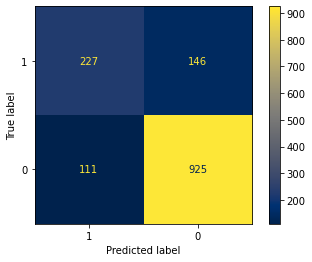

In [65]:
xgb_clf = XGBClassifier(n_estimators=500, max_depth=1, max_leaves=2, random_state=0)
xgb_clf.fit(X_train, y_train)
y_pred = xgb_clf.predict(X_test)
clf = 'XGBoost'
model_eval(clf, y_test, y_pred)

In [66]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import RidgeClassifier
from sklearn.svm import LinearSVC

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



LogisticRegression
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.66      0.58      0.62       373

    accuracy                           0.81      1409
   macro avg       0.76      0.74      0.74      1409
weighted avg       0.80      0.81      0.80      1409

ROC_AUC_Score: 0.7355
F1 Score: 0.6163


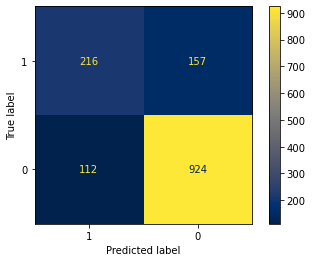

In [67]:
lr = LogisticRegression(max_iter=2000,penalty='l2')
lr=lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
clf = 'LogisticRegression'
model_eval(clf, y_test, y_pred)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

C:\Users\USER\anaconda3\lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning:

Liblinear failed to converge, increase the number of iterations.



support vector machines
              precision    recall  f1-score   support

           0       0.85      0.89      0.87      1036
           1       0.65      0.58      0.61       373

    accuracy                           0.81      1409
   macro avg       0.75      0.73      0.74      1409
weighted avg       0.80      0.81      0.80      1409

ROC_AUC_Score: 0.7332
F1 Score: 0.6125


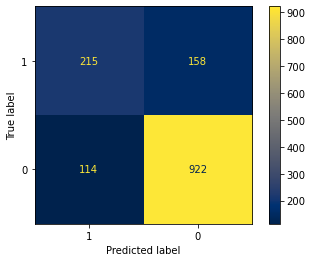

In [68]:
svm =LinearSVC()
svm=svm.fit(X_train, y_train)
y_pred = svm.predict(X_test)
clf = 'support vector machines'
model_eval(clf, y_test, y_pred)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



decision tree classifier
              precision    recall  f1-score   support

           0       0.84      0.81      0.83      1036
           1       0.52      0.56      0.54       373

    accuracy                           0.75      1409
   macro avg       0.68      0.69      0.68      1409
weighted avg       0.75      0.75      0.75      1409

ROC_AUC_Score: 0.6888
F1 Score: 0.5419


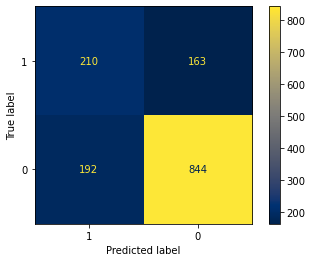

In [69]:
dt=DecisionTreeClassifier()
dt=dt.fit(X_train, y_train)
y_pred = dt.predict(X_test)
clf = 'decision tree classifier'
model_eval(clf, y_test, y_pred)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



AdaBoostClassifier
              precision    recall  f1-score   support

           0       0.86      0.88      0.87      1036
           1       0.65      0.62      0.63       373

    accuracy                           0.81      1409
   macro avg       0.76      0.75      0.75      1409
weighted avg       0.81      0.81      0.81      1409

ROC_AUC_Score: 0.7489
F1 Score: 0.6336


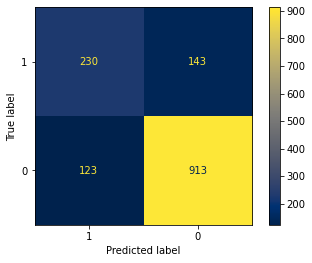

In [70]:
ada=AdaBoostClassifier()
ada=ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)
clf = 'AdaBoostClassifier'
model_eval(clf, y_test, y_pred)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



random forest classifier
              precision    recall  f1-score   support

           0       0.85      0.91      0.88      1036
           1       0.69      0.55      0.61       373

    accuracy                           0.82      1409
   macro avg       0.77      0.73      0.75      1409
weighted avg       0.81      0.82      0.81      1409

ROC_AUC_Score: 0.7304
F1 Score: 0.6119


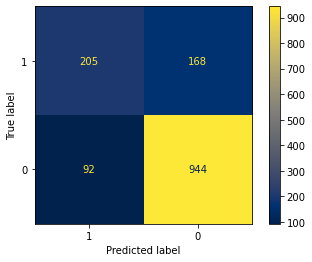

In [71]:
rfw=RandomForestClassifier()
rfw=rfw.fit(X_train, y_train)
y_pred = rfw.predict(X_test)
clf = 'random forest classifier'
model_eval(clf, y_test, y_pred)

## Tenure

In [72]:
y = model_df['Tenure in Months']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_test[1]

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



array([ 0.50690738, -1.49268232, -0.44717768, -0.99053183,  0.99053183,
       -1.03453023,  1.03453023, -1.82450707,  1.82450707, -0.32743831,
        0.32743831,  0.85417615, -0.85417615,  1.90140322, -1.90140322,
        0.63393298, -0.63393298,  0.72556272, -0.72556272,  0.72396752,
       -0.72396752,  0.63943864, -0.63943864,  0.79013171, -0.79013171,
        0.79607014, -0.79607014,  0.73906221, -0.73906221,  1.43695476,
       -1.43695476, -1.02545522, -0.53120365,  1.65538757, -0.8297975 ,
        0.8297975 , -1.1168204 ,  1.24980901, -0.24046865])

In [73]:
xgb_r = XGBRegressor(n_estimators=1000, random_state=42)
xgb_r.fit(X_train,y_train)
y_pred = xgb_r.predict(X_test)
print(f'R Squared Score of XGBRegressor: {r2_score(y_pred, y_test)}')

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



R Squared Score of XGBRegressor: 0.9961404714760677


## Predictions on a Custom User Data

In [74]:
def TEST(test,z):
    listtest=[]
    L={'c1':['Age','Monthly Charge','Total Charges'],
      'c2':['Number of Dependents','Married','Phone Service','Multiple Lines','Internet Service','Online Security','Online Backup','Paperless Billing',
            'Device Protection Plan','Premium Tech Support','Streaming TV','Streaming Movies','Streaming Music','Unlimited Data']}
    for k in test:
        if k in L['c1']:
            x=(test[k]-z[k][1])/z[k][2]
            listtest.append(x)
        elif k in L['c2']:
            a=str(k)+'_Yes'
            b=str(k)+'_No'
            if test[k]=='Yes':
                x1=(0-z[b][1])/z[b][2]
                x2=(1-z[a][1])/z[a][2]
            else:
                x1=(1-z[b][1])/z[b][2]
                x2=(0-z[a][1])/z[a][2]
            listtest.append(x1)
            listtest.append(x2)
        elif k=='Gender':
            a=str(k)+'_Female'
            b=str(k)+'_Male'
            if test[k]=='Female':
                x1=(1-z[a][1])/z[a][2]
                x2=(0-z[b][1])/z[b][2]
            else:
                x1=(0-z[a][1])/z[a][2]
                x2=(1-z[b][1])/z[b][2]
            listtest.append(x1)
            listtest.append(x2)
        elif k=='Contract':
            for i in ['Month-to-Month','One Year','Two Year']:
                a=str(k)+'_'+str(i)
                if test[k]==i:
                    x=(1-z[a][1])/z[a][2]
                else:
                    x=(0-z[a][1])/z[a][2]
                listtest.append(x)
        elif k=='Payment Method':
            for i in ['Bank Withdrawal','Credit Card','Mailed Check']:
                a=str(k)+'_'+str(i)
                if test[k]==i:
                    x=(1-z[a][1])/z[a][2]
                else:
                    x=(0-z[a][1])/z[a][2]
                listtest.append(x)
    import numpy as np
    user_input=np.array([listtest])
    return user_input

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [75]:
test={'Age':78,'Monthly Charge':39,'Total Charges':165,'Gender':'Male','Married':'No',
      'Number of Dependents':'No','Phone Service':'No','Multiple Lines':'No','Internet Service':'Yes',
      'Online Security':'No','Online Backup':'No','Device Protection Plan':'No','Premium Tech Support':'No',
      'Streaming TV':'No','Streaming Movies':'No','Streaming Music':'No','Unlimited Data':'No','Contract':'Month-to-Month',
      'Paperless Billing':'No','Payment Method':'Credit Card'}

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [76]:
churn = ['No', 'Yes']
print('Số tháng khách hàng sẽ ở lại với cty:',xgb_r.predict(TEST(test,z))[0])
print('KH có rời bỏ không?',churn[xgb_clf.predict(TEST(test,z))[0]])
print('xác suất khách hàng ở lại công ty là:',(100-xgb_clf.predict_proba(TEST(test,z))[:, 1][0]*100))

Số tháng khách hàng sẽ ở lại với cty: 3.8653066
KH có rời bỏ không? Yes
xác suất khách hàng ở lại công ty là: 41.24824404716492


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [77]:
test={'Age':30,'Monthly Charge':50,'Total Charges':3640,'Gender':'Male','Married':'Yes',
      'Number of Dependents':'Yes','Phone Service':'No','Multiple Lines':'No','Internet Service':'Yes',
      'Online Security':'No','Online Backup':'No','Device Protection Plan':'No','Premium Tech Support':'No',
      'Streaming TV':'No','Streaming Movies':'No','Streaming Music':'No','Unlimited Data':'No','Contract':'Month-to-Month',
      'Paperless Billing':'No','Payment Method':'Credit Card'}

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [78]:
print('Số tháng khách hàng sẽ ở lại với cty:',xgb_r.predict(TEST(test,z))[0])
print('KH có rời bỏ không?',churn[xgb_clf.predict(TEST(test,z))[0]])
print('xác suất khách hàng ở lại công ty là:',(100-xgb_clf.predict_proba(TEST(test,z))[:, 1][0]*100))

Số tháng khách hàng sẽ ở lại với cty: 70.81738
KH có rời bỏ không? No
xác suất khách hàng ở lại công ty là: 95.4227976500988


C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [79]:
# model_df.replace(['Đã rời bỏ','Chưa rời bỏ'], ['Churned','Not Churn'], inplace=True)
# model_df

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.



In [80]:
# export_csv = model_df.to_csv (r'Telco_customer_churn.csv', index = None, header=True)

C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning:

`should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.

